In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, auc, roc_curve, confusion_matrix
from sklearn.feature_extraction import DictVectorizer
# Set plot style
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings('ignore')

print("✓ All libraries imported successfully!\n")

✓ All libraries imported successfully!



In [ ]:
print("=" * 80)
print("LOADING AND EXPLORING DATA")
print("=" * 80)

LOADING AND EXPLORING DATA


In [ ]:
df = pd.read_csv('dune_data.csv')
df

,active_weeks,target_variable,total_volume,trader_activity_status,trader_volume_status,trader_weekly_frequency_status,tx_count_365d,wallet
0,1,🔴 Bad Trader,38.726119,🐤 Regular User,🦐 Low Value Trader,🐣 Unserious,2,0xa3c6acd45396110466fd8972875b3e6d33a0b0b8
1,1,🔴 Bad Trader,135.943754,🐣 Occasional User,🐟 Middle Value Trader,🐣 Unserious,1,0xbc0452c93e33b886d0e6750a9fc261e1d3c877ed
2,1,🔴 Bad Trader,0.457897,🐣 Occasional User,🦐 Low Value Trader,🐣 Unserious,1,0x477b0f0e29494a1e108a302ffecff3d76663386c
3,5,🔴 Bad Trader,37.614307,🐤 Regular User,🦐 Low Value Trader,🐦 OG,8,0x02170d140c843646d4802f6e65f9236baccc2f70
4,1,🔴 Bad Trader,2.389608,🐣 Occasional User,🦐 Low Value Trader,🐣 Unserious,1,0xcb69aceac5956af777d4d77c8d01c1fdea5828bd
...,...,...,...,...,...,...,...,...
1995,1,🔴 Bad Trader,30.584974,🐣 Occasional User,🦐 Low Value Trader,🐣 Unserious,1,0x05a3f364d84287eb3b18757643f47cd507b58438
1996,1,🔴 Bad Trader,0.109873,🐣 Occasional User,🦐 Low Value Trader,🐣 Unserious,1,0x8eb4cddb7e78fb0d5ebb75670122d2271de652a4
1997,1,🔴 Bad Trader,0.827270,🐤 Regular User,🦐 Low Value Trader,🐣 Unserious,2,0x9ef6be20528016d65e16900cb0392eb259a743ac
1998,1,🔴 Bad Trader,200.986683,🐤 Regular User,🐟 Middle Value Trader,🐣 Unserious,2,0xabaef3332e1440b3585a7ceebd6b674fbd0253f9


In [ ]:
print("\n" + "=" * 80)
print(" EXPLORATORY DATA ANALYSIS")
print("=" * 80)


 EXPLORATORY DATA ANALYSIS


In [ ]:
print("\nData Types:")
print(df.dtypes)


Data Types:
active_weeks                        int64
target_variable                    object
total_volume                      float64
trader_activity_status             object
trader_volume_status               object
trader_weekly_frequency_status     object
tx_count_365d                       int64
wallet                             object
dtype: object


In [ ]:
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
       active_weeks  total_volume  tx_count_365d
count   2000.000000  2.000000e+03    2000.000000
mean       7.452000  1.381682e+05     130.254500
std        9.820281  2.388449e+06    2702.634291
min        1.000000  3.873770e-07       1.000000
25%        1.000000  3.383906e+01       2.000000
50%        3.000000  3.327111e+02       6.000000
75%       10.000000  5.036433e+03      26.000000
max       53.000000  8.256017e+07  113968.000000


In [ ]:
# Check target variable distribution:
print(df['target_variable'].value_counts())

target_variable
🔴 Bad Trader     1000
🟢 Good Trader    1000
Name: count, dtype: int64


In [ ]:
# Encode target variable: convert '🔴 Bad Trader' to 0 and '🟢 Good Trader' to 1
df.target_variable = (df.target_variable == '🟢 Good Trader' ).astype(int)

In [ ]:
df = df.drop(columns=['wallet']) # This is an identifier  and has no predictive power, so it's removed.
df

,active_weeks,target_variable,total_volume,trader_activity_status,trader_volume_status,trader_weekly_frequency_status,tx_count_365d
0,1,0,38.726119,🐤 Regular User,🦐 Low Value Trader,🐣 Unserious,2
1,1,0,135.943754,🐣 Occasional User,🐟 Middle Value Trader,🐣 Unserious,1
2,1,0,0.457897,🐣 Occasional User,🦐 Low Value Trader,🐣 Unserious,1
3,5,0,37.614307,🐤 Regular User,🦐 Low Value Trader,🐦 OG,8
4,1,0,2.389608,🐣 Occasional User,🦐 Low Value Trader,🐣 Unserious,1
...,...,...,...,...,...,...,...
1995,1,0,30.584974,🐣 Occasional User,🦐 Low Value Trader,🐣 Unserious,1
1996,1,0,0.109873,🐣 Occasional User,🦐 Low Value Trader,🐣 Unserious,1
1997,1,0,0.827270,🐤 Regular User,🦐 Low Value Trader,🐣 Unserious,2
1998,1,0,200.986683,🐤 Regular User,🐟 Middle Value Trader,🐣 Unserious,2


In [ ]:
# Standardize string values
string_cols = df.select_dtypes(include='object').columns
for col in string_cols:
    df[col] = df[col].str.lower().str.replace(' ', '_')

print("✓ Column names and values standardized\n")

✓ Column names and values standardized



<Axes: xlabel='total_volume', ylabel='Count'>

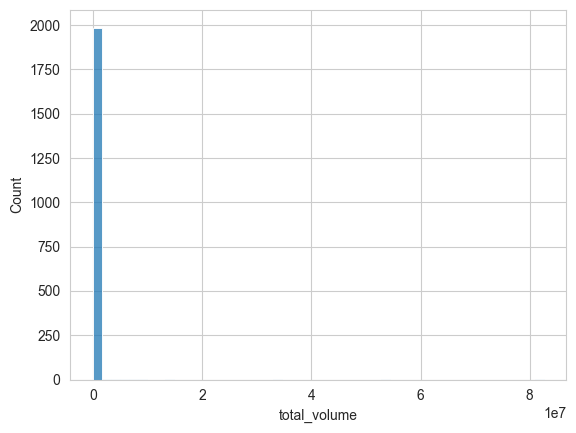

In [ ]:
#total volume distribution
sns.histplot(df.total_volume, bins= 50)

<Axes: xlabel='total_volume', ylabel='Count'>

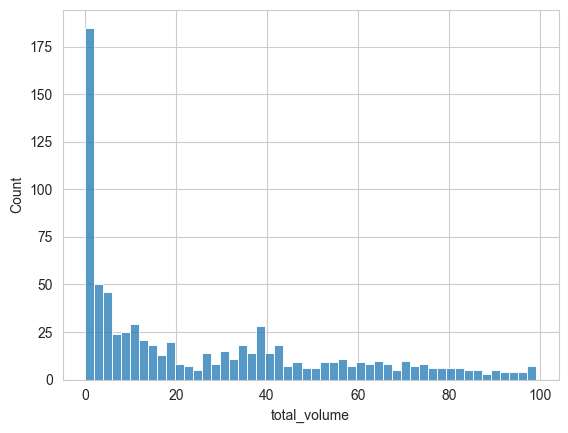

In [ ]:
sns.histplot(df.total_volume[df.total_volume < 100], bins= 50) 

<Axes: xlabel='total_volume', ylabel='Count'>

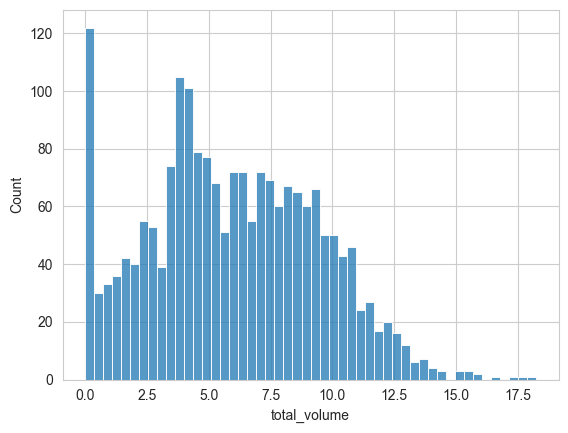

In [ ]:
vol_logs = np.log1p(df.total_volume)
sns.histplot(vol_logs, bins= 50)

In [ ]:
print("\n" + "=" * 80)
print(" SPLIT DATASET")
print("=" * 80)


 SPLIT DATASET


In [ ]:

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
len(df_full_train), len(df_test)

(1600, 400)

In [ ]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
len(df_train), len(df_test), len(df_val)


(1200, 400, 400)

In [ ]:
# Separate the target variable (y) from the features (X) for the training and test sets
y_train = df_train.target_variable.values
y_val = df_val.target_variable.values
y_test = df_test.target_variable.values

In [ ]:
# Remove the target variable from the feature DataFrames
del df_train['target_variable']
del df_val['target_variable']
del df_test['target_variable']

df_full_train = df_full_train.reset_index(drop=True) # Reset the index of the new dataframes to ensure a clean sequential index from 0
df_full_train

,active_weeks,target_variable,total_volume,trader_activity_status,trader_volume_status,trader_weekly_frequency_status,tx_count_365d
0,1,0,38.726119,🐤_regular_user,🦐_low_value_trader,🐣_unserious,2
1,25,1,159897.135874,🐦_frequent_user,🐳_high_value_trader,🐦_og,441
2,13,1,37413.737637,🐦_frequent_user,🐟_middle_value_trader,🐦_og,43
3,4,1,193.688500,🐦_frequent_user,🐟_middle_value_trader,🐦_og,11
4,3,1,590.749925,🐤_regular_user,🐟_middle_value_trader,🐦_og,8
...,...,...,...,...,...,...,...
1595,1,0,1.087072,🐤_regular_user,🦐_low_value_trader,🐣_unserious,2
1596,11,1,11192.907925,🐦_frequent_user,🐟_middle_value_trader,🐦_og,13
1597,1,0,108.451415,🐣_occasional_user,🐟_middle_value_trader,🐣_unserious,1
1598,2,0,58.831873,🐤_regular_user,🦐_low_value_trader,🐤_just_there,2


In [ ]:
df_full_train.target_variable.value_counts(normalize=True)

target_variable
0    0.501875
1    0.498125
Name: proportion, dtype: float64

In [ ]:
good_trader_rate = df_full_train.target_variable.mean() #GTR
good_trader_rate

np.float64(0.498125)

In [ ]:
df_full_train.dtypes

active_weeks                        int64
target_variable                     int64
total_volume                      float64
trader_activity_status             object
trader_volume_status               object
trader_weekly_frequency_status     object
tx_count_365d                       int64
dtype: object

In [ ]:
print("\n" + "=" * 80)
print(" FEATURE ENGINEERING")
print("=" * 80)


 FEATURE ENGINEERING


In [ ]:
df_full_train.trader_activity_status.value_counts()

trader_activity_status
🐦_frequent_user      653
🐤_regular_user       552
🐣_occasional_user    395
Name: count, dtype: int64

In [ ]:
good_rate_activity = df_full_train.groupby('trader_activity_status')['target_variable'].mean()
good_rate_activity

trader_activity_status
🐣_occasional_user    0.000000
🐤_regular_user       0.394928
🐦_frequent_user      0.886677
Name: target_variable, dtype: float64

In [ ]:
df_full_train.trader_volume_status.value_counts()

trader_volume_status
🐟_middle_value_trader    923
🦐_low_value_trader       564
🐳_high_value_trader      113
Name: count, dtype: int64

In [ ]:
good_rate_vol = df_full_train.groupby('trader_volume_status')['target_variable'].mean()
good_rate_vol

trader_volume_status
🐟_middle_value_trader    0.743229
🐳_high_value_trader      0.982301
🦐_low_value_trader       0.000000
Name: target_variable, dtype: float64

In [ ]:
df_full_train.trader_weekly_frequency_status.value_counts()

trader_weekly_frequency_status
🐦_og            865
🐣_unserious     541
🐤_just_there    194
Name: count, dtype: int64

In [ ]:
good_rate_freq = df_full_train.groupby('trader_weekly_frequency_status')['target_variable'].mean()
good_rate_freq

trader_weekly_frequency_status
🐣_unserious     0.000000
🐤_just_there    0.402062
🐦_og            0.831214
Name: target_variable, dtype: float64

In [ ]:
print("\n" + "=" * 80)
print(" RELATIVE RATIO")
print("=" * 80)


 RELATIVE RATIO


In [ ]:
df_full_train.shape

(1600, 7)

In [ ]:
#vol per transaction
df_full_train['vol_per_tx'] = df_full_train['total_volume'] / (df_full_train['tx_count_365d'] +1)
df_test['vol_per_tx'] = df_test['total_volume'] / (df_test['tx_count_365d'] +1)

In [ ]:
#Activity Efficiency
df_full_train['activity_per_week'] = df_full_train['tx_count_365d'] / (df_full_train['active_weeks'] +1)
df_test['activity_per_week'] = df_test['tx_count_365d'] / (df_test['active_weeks'] +1)

In [ ]:
#Avg weekly vol
df_full_train['avg_weekly_vol'] = df_full_train['total_volume'] / (df_full_train['active_weeks'] +1)
df_test['avg_weekly_vol'] = df_test['total_volume'] / (df_test['active_weeks'] +1)

In [ ]:
# Add Feature Engineering block to df_traiin
df_train['vol_per_tx'] = df_train['total_volume'] / (df_train['tx_count_365d'] + 1)
df_train['activity_per_week'] = df_train['tx_count_365d'] / (df_train['active_weeks'] + 1)
df_train['avg_weekly_vol'] = df_train['total_volume'] / (df_train['active_weeks'] + 1)

# Add Feature Engineering block to df val
df_val['vol_per_tx'] = df_val['total_volume'] / (df_val['tx_count_365d'] + 1)
df_val['activity_per_week'] = df_val['tx_count_365d'] / (df_val['active_weeks'] + 1)
df_val['avg_weekly_vol'] = df_val['total_volume'] / (df_val['active_weeks'] + 1)

In [ ]:
numerical = ['active_weeks','total_volume', 'tx_count_365d', 'vol_per_tx', 'activity_per_week', 'avg_weekly_vol']

In [ ]:
df_full_train

,active_weeks,target_variable,total_volume,trader_activity_status,trader_volume_status,trader_weekly_frequency_status,tx_count_365d,vol_per_tx,activity_per_week,avg_weekly_vol
0,1,0,38.726119,🐤_regular_user,🦐_low_value_trader,🐣_unserious,2,12.908706,1.000000,19.363060
1,25,1,159897.135874,🐦_frequent_user,🐳_high_value_trader,🐦_og,441,361.758226,16.961538,6149.889841
2,13,1,37413.737637,🐦_frequent_user,🐟_middle_value_trader,🐦_og,43,850.312219,3.071429,2672.409831
3,4,1,193.688500,🐦_frequent_user,🐟_middle_value_trader,🐦_og,11,16.140708,2.200000,38.737700
4,3,1,590.749925,🐤_regular_user,🐟_middle_value_trader,🐦_og,8,65.638881,2.000000,147.687481
...,...,...,...,...,...,...,...,...,...,...
1595,1,0,1.087072,🐤_regular_user,🦐_low_value_trader,🐣_unserious,2,0.362357,1.000000,0.543536
1596,11,1,11192.907925,🐦_frequent_user,🐟_middle_value_trader,🐦_og,13,799.493423,1.083333,932.742327
1597,1,0,108.451415,🐣_occasional_user,🐟_middle_value_trader,🐣_unserious,1,54.225707,0.500000,54.225707
1598,2,0,58.831873,🐤_regular_user,🦐_low_value_trader,🐤_just_there,2,19.610624,0.666667,19.610624


In [ ]:
print("\n" + "=" * 80)
print(" FEATURE IMPORTANCE: CORRELATION")
print("=" * 80)


 FEATURE IMPORTANCE: CORRELATION


In [ ]:
df_full_train.active_weeks.max()

np.int64(53)

In [ ]:
df_full_train[numerical]

,active_weeks,total_volume,tx_count_365d,vol_per_tx,activity_per_week,avg_weekly_vol
0,1,38.726119,2,12.908706,1.000000,19.363060
1,25,159897.135874,441,361.758226,16.961538,6149.889841
2,13,37413.737637,43,850.312219,3.071429,2672.409831
3,4,193.688500,11,16.140708,2.200000,38.737700
4,3,590.749925,8,65.638881,2.000000,147.687481
...,...,...,...,...,...,...
1595,1,1.087072,2,0.362357,1.000000,0.543536
1596,11,11192.907925,13,799.493423,1.083333,932.742327
1597,1,108.451415,1,54.225707,0.500000,54.225707
1598,2,58.831873,2,19.610624,0.666667,19.610624


In [ ]:
'''for the positive corr the higher the category result the higher chance for them to be a good trader'''
df_full_train[numerical].corrwith(df_full_train.target_variable)  # .abs() for absolute 

active_weeks         0.538168
total_volume         0.060747
tx_count_365d        0.049071
vol_per_tx           0.062895
activity_per_week    0.062632
avg_weekly_vol       0.076309
dtype: float64

In [ ]:
df_full_train[df_full_train.active_weeks > 20].target_variable.mean()

np.float64(0.9823529411764705)

In [ ]:
df_full_train[df_full_train.active_weeks <= 20].target_variable.mean()

np.float64(0.4405594405594406)

In [ ]:
print("\n" + "=" * 80)
print(" ONE-HOT ENCODING")
print("=" * 80)


 ONE-HOT ENCODING


In [ ]:
df_train

,active_weeks,total_volume,trader_activity_status,trader_volume_status,trader_weekly_frequency_status,tx_count_365d,vol_per_tx,activity_per_week,avg_weekly_vol
1846,2,4.051415e+01,🐤_regular_user,🦐_low_value_trader,🐤_just_there,2,13.504716,0.666667,13.504716
335,25,5.852545e+03,🐦_frequent_user,🐟_middle_value_trader,🐦_og,34,167.215583,1.307692,225.097900
1322,1,7.016947e+02,🐤_regular_user,🐟_middle_value_trader,🐣_unserious,2,233.898233,1.000000,350.847349
1410,1,7.433765e+01,🐣_occasional_user,🐟_middle_value_trader,🐣_unserious,1,37.168823,0.500000,37.168823
1163,24,3.550407e+04,🐦_frequent_user,🐟_middle_value_trader,🐦_og,120,293.422041,4.800000,1420.162677
...,...,...,...,...,...,...,...,...,...
84,1,6.395833e+01,🐣_occasional_user,🦐_low_value_trader,🐣_unserious,1,31.979166,0.500000,31.979166
246,2,3.972982e+00,🐤_regular_user,🦐_low_value_trader,🐤_just_there,8,0.441442,2.666667,1.324327
272,51,1.386777e+07,🐦_frequent_user,🐳_high_value_trader,🐦_og,36468,380.261811,701.307692,266687.845757
460,6,1.814938e+03,🐦_frequent_user,🐟_middle_value_trader,🐦_og,27,64.819221,3.857143,259.276884


In [ ]:
# Convert DataFrames to the dictionary format required by DictVectorizer
train_dicts = df_train[numerical].to_dict(orient='records')
val_dicts = df_val[numerical].to_dict(orient='records')


In [ ]:
dv = DictVectorizer(sparse=False)

In [ ]:
# Fit and Transform on Train, Transform on Validation/Test
X_train = dv.fit_transform(train_dicts)

# Learns the vocabulary and OHE schema and applies the OHE/transform to the training data.
X_val = dv.transform(val_dicts)


In [ ]:
print("\n" + "=" * 80)
print(" LOGISTIC REGRESSION")
print("=" * 80)


 LOGISTIC REGRESSION


In [ ]:
model = LogisticRegression(C=0.1,
    max_iter=1000,
    random_state=42,)
 
model.fit(X_train, y_train) # Train the model using the prepared features (X_train) and the target variable (y_train)

LogisticRegression(C=0.1, max_iter=1000, random_state=42)

In [ ]:
model.coef_[0].round(3)

array([-0.38 , -0.124, -0.427,  0.214,  0.025, -0.   ])

In [ ]:
y_pred = model.predict_proba(X_val)[:, 1]  # [:, 1] selects only the probability of the positive class (1: Good Trader)

trader_decision =(y_pred >= 0.5)

(y_val == trader_decision).mean()

np.float64(0.99)

In [ ]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = trader_decision.astype(int)
df_pred['actual'] = y_val

df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred

,probability,prediction,actual,correct
0,0.000581,0,0,True
1,0.802054,1,1,True
2,1.000000,1,1,True
3,0.000737,0,0,True
4,1.000000,1,1,True
...,...,...,...,...
395,1.000000,1,1,True
396,1.000000,1,1,True
397,0.936056,1,1,True
398,0.000462,0,0,True


In [ ]:
df_pred.correct.mean()

np.float64(0.99)

In [ ]:
scores = cross_val_score(model, X_train, y_train, cv=5)
print("CV accuracies:", scores)
print("Mean:", np.mean(scores))

CV accuracies: [0.9875     0.98333333 0.9875     0.9875     0.99166667]
Mean: 0.9875


In [ ]:
print("\n" + "=" * 80)
print(" MODEL INTERPRETATION")
print("=" * 80)


 MODEL INTERPRETATION


In [ ]:
'''this allows 2 lists or sequence to be combined by the element of each, in this case we combine feature to its coef of Good trader'''
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)) )

{'active_weeks': np.float64(-0.38),
 'activity_per_week': np.float64(-0.124),
 'avg_weekly_vol': np.float64(-0.427),
 'total_volume': np.float64(0.214),
 'tx_count_365d': np.float64(0.025),
 'vol_per_tx': np.float64(-0.0)}

In [ ]:
print("\n" + "=" * 80)
print(" TRAINING ON FULL TRAIN DATASET")
print("=" * 80)


 TRAINING ON FULL TRAIN DATASET


In [ ]:
df_full_train.columns

Index(['active_weeks', 'target_variable', 'total_volume',
       'trader_activity_status', 'trader_volume_status',
       'trader_weekly_frequency_status', 'tx_count_365d', 'vol_per_tx',
       'activity_per_week', 'avg_weekly_vol'],
      dtype='object')

In [ ]:
df_test.columns

Index(['active_weeks', 'total_volume', 'trader_activity_status',
       'trader_volume_status', 'trader_weekly_frequency_status',
       'tx_count_365d', 'vol_per_tx', 'activity_per_week', 'avg_weekly_vol'],
      dtype='object')

In [ ]:
dict_full_train = df_full_train[numerical].to_dict(orient='records')
dict_test = df_test[numerical].to_dict(orient='records')

In [ ]:
X_full_train = dv.fit_transform(dict_full_train)

In [ ]:
y_full_train = df_full_train.target_variable.values
del df_full_train['target_variable']


In [ ]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

LogisticRegression()

In [ ]:
print("\n" + "=" * 80)
print(" USING THE MODEL")
print("=" * 80)


 USING THE MODEL


In [ ]:
dict_test = df_test[numerical].to_dict(orient='records')

In [ ]:
X_test = dv.transform(dict_test)

In [ ]:
y_pred_prob = model.predict_proba(X_test)[:, 1]


In [ ]:
# Convert predicted probabilities into binary decisions using 0.5 threshold, then calculate accuracy by comparing with true labels
trader_decision = (y_pred >= 0.5)
(trader_decision == y_test).mean()

np.float64(0.485)

In [ ]:
trader = dict_test[200]
trader

{'active_weeks': 20,
 'total_volume': 148824.5027052862,
 'tx_count_365d': 77,
 'vol_per_tx': 1908.0064449395666,
 'activity_per_week': 3.6666666666666665,
 'avg_weekly_vol': 7086.881081204105}

In [ ]:
X_small = dv.transform([trader])

In [ ]:
X_small.shape

(1, 6)

In [ ]:
model.predict_proba(X_small)[0, 1]

np.float64(1.0)

In [ ]:
y_test[200]

np.int64(1)

In [ ]:
print("\n" + "=" * 80)
print(" ACCURACY AND DUMMY")
print("=" * 80)


 ACCURACY AND DUMMY


In [ ]:
len(y_test)

400

In [ ]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:

    score = accuracy_score(y_test, y_pred_prob >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)
    


0.00 0.507
0.05 0.980
0.10 0.983
0.15 0.980
0.20 0.983
0.25 0.980
0.30 0.980
0.35 0.980
0.40 0.978
0.45 0.978
0.50 0.983
0.55 0.988
0.60 0.990
0.65 0.988
0.70 0.988
0.75 0.983
0.80 0.983
0.85 0.983
0.90 0.978
0.95 0.975
1.00 0.930


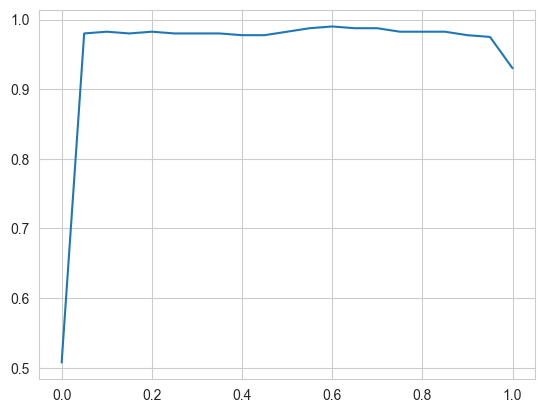

In [ ]:
plt.plot(thresholds, scores)

In [ ]:
scores = cross_val_score(model, X_full_train, y_full_train, cv=5)
print("CV accuracies:", scores)
print("Mean:", np.mean(scores))

CV accuracies: [0.990625 0.99375  0.9875   0.990625 0.9875  ]
Mean: 0.99


In [ ]:
print("\n" + "=" * 80)
print(" CONFUSION TABLE")
print("=" * 80)


 CONFUSION TABLE


In [ ]:
actual_positive = (y_test == 1)
actual_negative = (y_test == 0)

In [ ]:
t= 0.5 # Convert probability predictions to binary predictions (0 or 1) based on the chosen threshold (default is 0.5)
predict_positive = (y_pred_prob >= t)
predict_negative = (y_pred_prob < t)

In [ ]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()


fp = (predict_positive & actual_negative).sum()  # Predicted positive, but actual negative
fn = (predict_negative & actual_positive).sum()  # Predicted negative, but actual positive

# You can then verify with the correct print:
print(f"FN: {fn}, FP: {fp}, TP: {tp}, TN: {tn}")

FN: 4, FP: 3, TP: 199, TN: 194


In [ ]:
precision = tp / (tp + fp)
precision

np.float64(0.9851485148514851)

In [ ]:
recall = tp / (tp + fn)
recall

np.float64(0.9802955665024631)

In [ ]:
# Calculate True Positive Rate (TPR, also called Recall) and False Positive Rate (FPR)
tpr = tp / (tp + fn) #  Proportion of actual positive cases correctly identified
tpr #true positive rate

np.float64(0.9802955665024631)

In [ ]:
fpr = fp / (fp + tn) # Proportion of actual negative cases incorrectly classified as positive
fpr # false positive rate

np.float64(0.015228426395939087)

In [ ]:

scores = []

thresholds = np.linspace(0, 1, 101) # Create a list of thresholds from 0.0 to 1.0 (stepping by 0.01)

for t in thresholds: # Loop through each threshold to calculate the confusion matrix components
    
    actual_positive = (y_test == 1)
    actual_negative = (y_test == 0)

    predict_positive = (y_pred_prob >= t)
    predict_negative = (y_pred_prob < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()


    fp = (predict_positive & actual_negative).sum() 
    fn = (predict_negative & actual_positive).sum()  

    scores.append((t, tp, fp, fn, tn))

In [ ]:
cols = ['thresholds', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=cols) # Convert the list of scores to a DataFrame for easier analysis

In [ ]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

df_scores[::10] # Display a subset of the scores table (every 10th row)

,thresholds,tp,fp,fn,tn,tpr,fpr
0,0.0,203,197,0,0,1.000000,1.000000
10,0.1,202,6,1,191,0.995074,0.030457
20,0.2,201,5,2,192,0.990148,0.025381
30,0.3,200,5,3,192,0.985222,0.025381
40,0.4,199,5,4,192,0.980296,0.025381
50,0.5,199,3,4,194,0.980296,0.015228
60,0.6,199,0,4,197,0.980296,0.000000
70,0.7,198,0,5,197,0.975369,0.000000
80,0.8,196,0,7,197,0.965517,0.000000
90,0.9,194,0,9,197,0.955665,0.000000


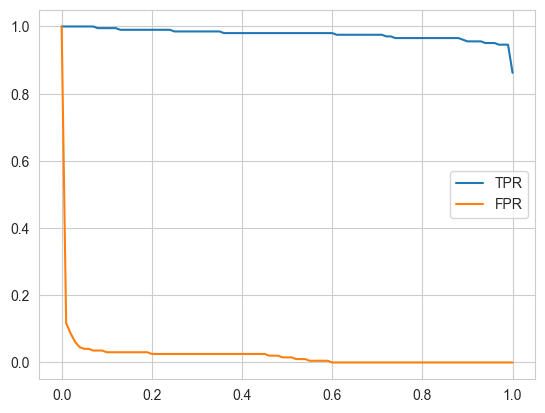

In [ ]:
# Plot the Receiver Operating Characteristic (ROC) curve
# This curve plots TPR (y-axis) vs. FPR (x-axis) for all possible thresholds.

plt.plot(df_scores.thresholds, df_scores['tpr'], label='TPR')
plt.plot(df_scores.thresholds, df_scores['fpr'], label='FPR')
plt.legend()

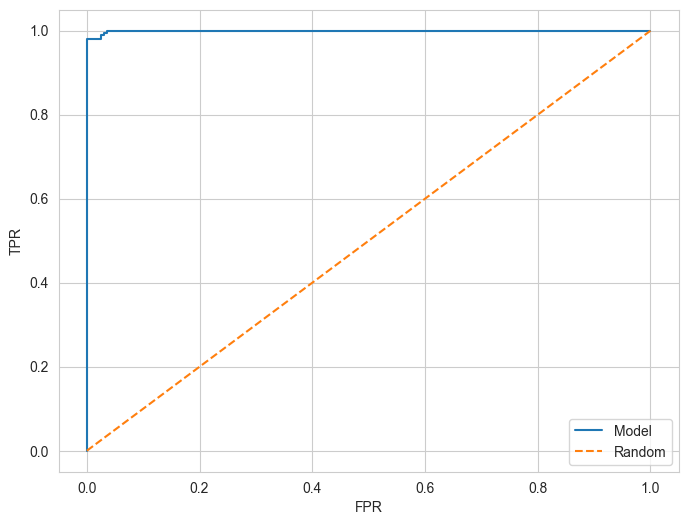

In [ ]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize= (8,6))
plt.plot(fpr, tpr, label = 'Model') # Plot the model's performance using the calculated FPR and TPR values
plt.plot([0, 1], [0, 1], label = 'Random', linestyle= '--')# Plot the performance of a random model (a straight dashed line from [0,0] to [1,1])

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [ ]:
auc(fpr, tpr) # This confirms the high performance score, which is very close to 1.0

np.float64(0.9994248705958841)

In [ ]:
# Final calculation of the Area Under the Curve (AUC) using scikit-learn's built-in function
roc_auc_score(y_test, y_pred_prob)# ROC AUC is a great metric for classification, measuring how well the model can distinguish between classes.

np.float64(0.9994248705958841)